In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
div.container{width:80% !important;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
span.toc-item-num{display:none;}
div.CodeMirror {font-family:Consolas}
div.input {font-family:Consolas}
</style>
"""))

In [5]:
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils  # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten  # 컨볼루션 작업 시 필요
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
# 데이터셋
width = 28
height = 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# y_test  # 원핫인코딩 전
X_test = X_test.reshape(10000, width*height).astype('float32') / 255.0
Y_test = utils.to_categorical(y_test)  # 원핫인코딩
print('학습 후 테스트 데이터 shape : ', X_test.shape, Y_test.shape)

학습 후 테스트 데이터 shape :  (10000, 784) (10000, 10)


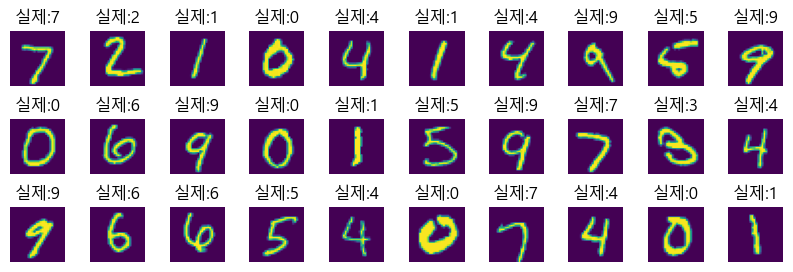

In [30]:
# 모델 학습 후 틀린 데이터 출력용(X_test와 Y_test)
plt_row = 3   # 3행  세로 
plt_col = 10  # 10열 가로
# plt.figure(figsize=(plt_col, plt_row))
plt.rcParams['figure.figsize'] = (plt_col, plt_row)
plt.rc('font', family='Malgun Gothic')  # 윈도우즈 os
# plt.rc('font', family='NanumBarunGothic')  # 코랩 os
fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)
plt.subplots_adjust(hspace=0.6, wspace=0.4)  # 상하여백, 좌우여백
for i in range(plt_row * plt_col):
    # X_test[i]를 axarr[0, i]에 출력(imshow). Y_test[i].argmax()의 실제값을 title에 출력
    sub_plot = axarr[i//plt_col, i%plt_col]
    sub_plot.imshow(X_test[i].reshape(width, height))
    # sub_plot.set_title('실제:' + str(y_test[i]))
    sub_plot.set_title('실제:' + str(Y_test[i].argmax()))
    sub_plot.axis('off')

# DNN

Epoch 1/300
1000/1000 [==============================] - 4s 3ms/step - loss: 0.2373 - accuracy: 0.9294 - val_loss: 0.1183 - val_accuracy: 0.9671
Epoch 2/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0949 - accuracy: 0.9710 - val_loss: 0.0884 - val_accuracy: 0.9742
Epoch 3/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0615 - accuracy: 0.9807 - val_loss: 0.0839 - val_accuracy: 0.9746
Epoch 4/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0442 - accuracy: 0.9855 - val_loss: 0.0903 - val_accuracy: 0.9744
Epoch 5/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0354 - accuracy: 0.9884 - val_loss: 0.0829 - val_accuracy: 0.9775
Epoch 6/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0266 - accuracy: 0.9913 - val_loss: 0.0918 - val_accuracy: 0.9757
Epoch 7/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0231 - accuracy: 0.9921 - val_loss: 0.0835 - val_ac

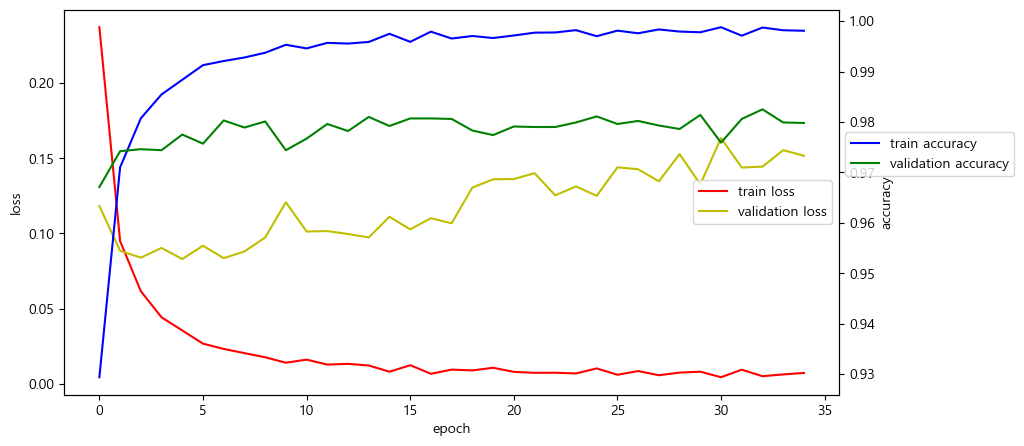

In [37]:
# 1. 데이터셋
width = 28
height = 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# y_test  # 원핫인코딩 전
X_train = X_train.reshape(60000, width*height).astype('float32') / 255.0
X_test = X_test.reshape(10000, width*height).astype('float32') / 255.0
# 훈련셋, 검증셋, 테스트셋 = 50000:10000:10000
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 원핫인코딩
Y_train = utils.to_categorical(y_train)
Y_val   = utils.to_categorical(y_val)
Y_test  = utils.to_categorical(y_test)
# print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(width*height, )))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10,  activation='softmax'))

# 3. 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 학습시키기
early_stop = EarlyStopping(patience=30)
hist = model.fit(X_train, Y_train, epochs=300, batch_size=50, validation_data=(X_val, Y_val), callbacks=[early_stop])

# 5. 학습과정 살펴보기 (validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [39]:
# 모델 평가하기
loss, acc = model.evaluate(X_test, Y_test)
loss, acc

313/313 [==============================] - 1s 2ms/step - loss: 0.1213 - accuracy: 0.9813


(0.12133406847715378, 0.9812999963760376)

In [46]:
# 성능평가지표 = 교차표
y_hat = model.predict(X_test).argmax(axis=1)  # 예측치
print('예측치 : ', y_hat)
print('실제값 : ', np.argmax(Y_test, axis=1))
print('실제값 : ', y_test)
pd.crosstab(y_test, y_hat)

313/313 [==============================] - 0s 1ms/step
예측치 :  [7 2 1 ... 4 5 6]
실제값 :  [7 2 1 ... 4 5 6]
실제값 :  [7 2 1 ... 4 5 6]


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,974,1,0,0,0,1,2,0,1,1
1,4,1121,1,0,0,3,1,1,3,1
2,4,1,1021,0,1,0,1,3,1,0
3,2,0,3,992,0,4,0,5,2,2
4,1,0,3,1,971,0,5,0,0,1
5,3,0,0,8,1,868,6,0,6,0
6,3,1,1,0,2,1,948,0,2,0
7,2,2,8,2,0,0,0,1004,4,6
8,12,0,5,2,5,4,4,2,937,3


In [48]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(y_test, y_hat)
cmatrix  # 2차원

array([[ 974,    1,    0,    0,    0,    1,    2,    0,    1,    1],
       [   4, 1121,    1,    0,    0,    3,    1,    1,    3,    1],
       [   4,    1, 1021,    0,    1,    0,    1,    3,    1,    0],
       [   2,    0,    3,  992,    0,    4,    0,    5,    2,    2],
       [   1,    0,    3,    1,  971,    0,    5,    0,    0,    1],
       [   3,    0,    0,    8,    1,  868,    6,    0,    6,    0],
       [   3,    1,    1,    0,    2,    1,  948,    0,    2,    0],
       [   2,    2,    8,    2,    0,    0,    0, 1004,    4,    6],
       [  12,    0,    5,    2,    5,    4,    4,    2,  937,    3],
       [   1,    2,    0,    6,    7,    5,    2,    4,    5,  977]],
      dtype=int64)

In [54]:
cnt = 0  # 실제값과 예측값이 다른 갯수
for i, row in enumerate(cmatrix):
    for j, data in enumerate(row):
        # print(i, j, data, end='\t')
        if i != j:  # 0행0열, 1행1열, ... 제외
            cnt += data
print('예측이 틀린 갯수 : ', cnt)

예측이 틀린 갯수 :  187


In [56]:
# y_hat   # 예측치
# y_test  # 실제값
cnt = 0
for y, h in zip(y_test, y_hat):
    if y != h:
        cnt += 1
print('예측이 틀린 갯수 : ', cnt)

예측이 틀린 갯수 :  187


i =  10000
cnt =  187


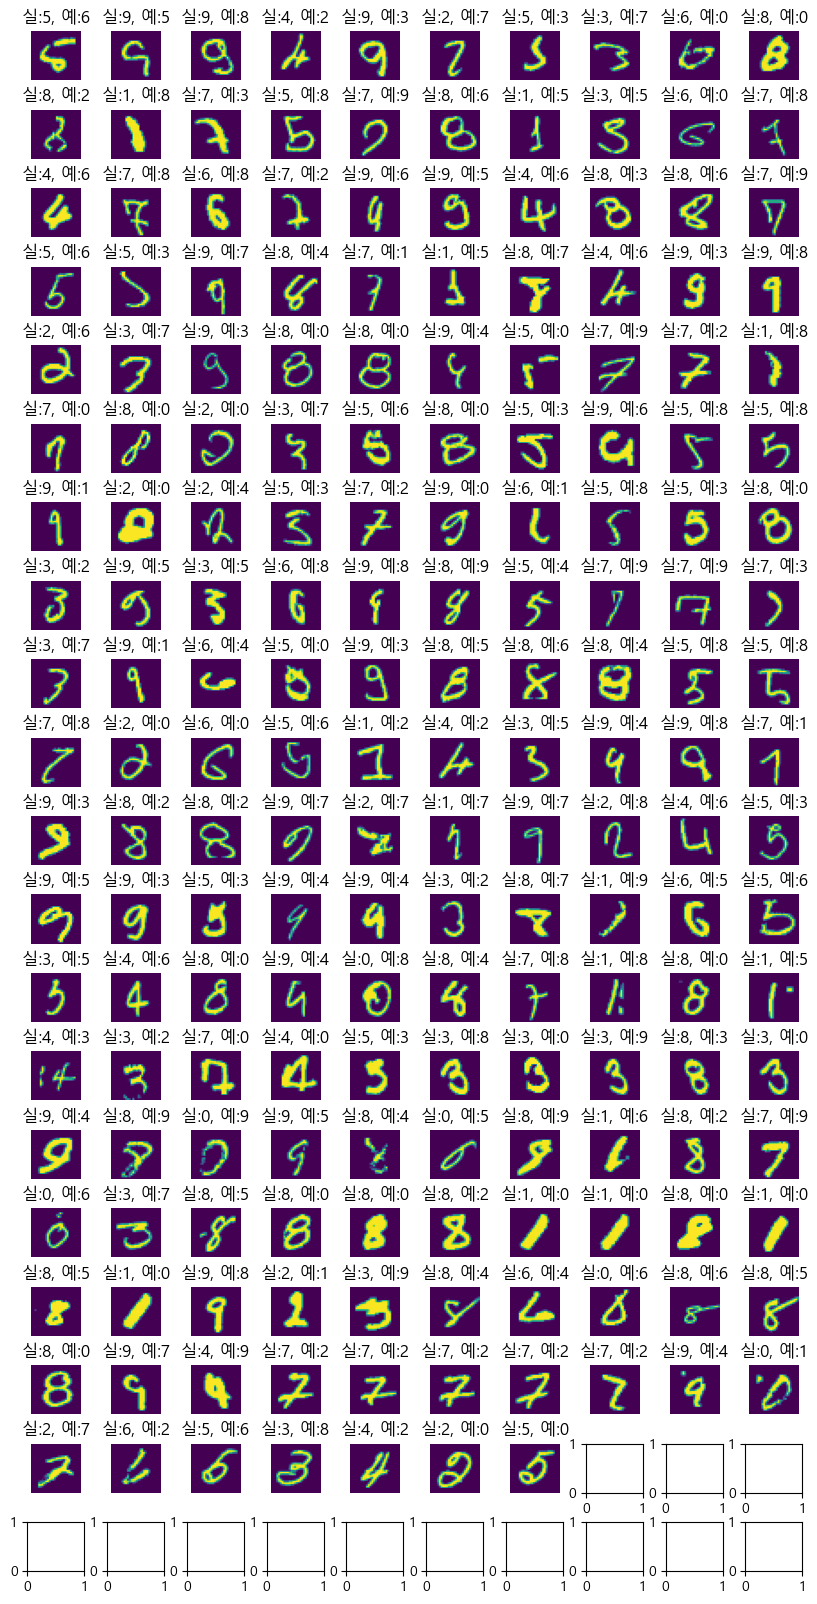

In [64]:
# 모델 학습 후 틀린 데이터 출력용(X_test와 Y_test)
plt_row = 20  # 10행 세로 
plt_col = 10  # 10열 가로
plt.rcParams['figure.figsize'] = (plt_col, plt_row)
plt.rc('font', family='Malgun Gothic')  # 윈도우즈 os
fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)
plt.subplots_adjust(hspace=0.6, wspace=0.4)  # 상하여백, 좌우여백

i = 0    # y_hat과 y_test를 액세스할 index
cnt = 0  # 출력할 횟수
while (cnt < plt_row*plt_col) & (i < len(y_test)):
    # 예측한 결과가 틀렸을 경우만 imshow(X_test[i]), 실제값과 예측치를 title에 출력
    if y_hat[i] == y_test[i]:  # 실제값 == 예측치일 경우
        i += 1
        continue
    # 예측한 값과 실제값이 다른 경우
    sub_plot = axarr[cnt // plt_col, cnt % plt_col]
    sub_plot.imshow(X_test[i].reshape(width, height))  # 예측이 틀린 그림
    title = '실:{}, 예:{}'.format(y_test[i], y_hat[i])
    sub_plot.set_title(title)
    sub_plot.axis('off')
    i += 1
    cnt += 1
print('i = ', i)
print('cnt = ', cnt)

# CNN
 - 컨볼루션 레이어 -> max pooling -> DNN (딥러닝 교안 p.35)
 
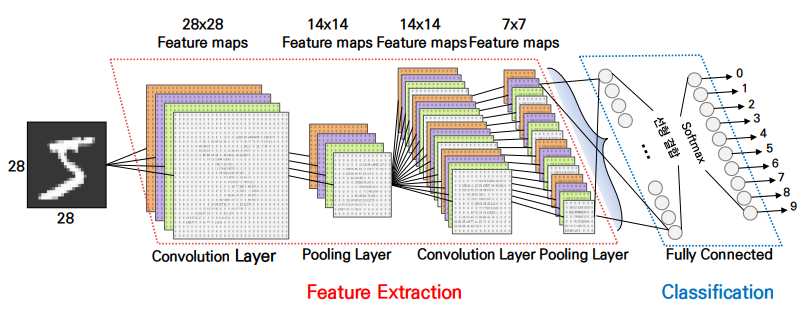

In [67]:
# 1. 데이터셋
width = 28
height = 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# y_test  # 원핫인코딩 전
X_train = X_train.reshape(60000, width, height).astype('float32') / 255.0
X_test = X_test.reshape(10000, width, height).astype('float32') / 255.0
# 훈련셋, 검증셋, 테스트셋 = 50000:10000:10000
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 원핫인코딩
Y_train = utils.to_categorical(y_train)
Y_val   = utils.to_categorical(y_val)
Y_test  = utils.to_categorical(y_test)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

# 2. 모델 생성
# Conv(3*3 사이즈 커널 32개) 28*28 => 28*28*32 // 26*26*32(28-3(커널사이즈)+1 = 26)
# MaxPooling (2*2 사이즈) 14*14*32 // 13*13*32
# Dropout()
# Conv(3*3 사이즈 커널 64개) 12*12*32*64 //  11*11*32*64(13(원사이즈)-3(커널사이즈)+1 = 11)
# MaxPooling (2*2 사이즈) 6*6*32*64
# Dropout()
# 1차원 데이터로 만들기 : Flatten() 이용
# Dropout()
# DNN(hidden layer 128 units 한층-output layer)
model = Sequential()
model.add(Conv2D(32,  # 커널 갯수
                 3,   # 커널 사이즈
                 padding='same',  # 입력층과 출력층의 갯수를 같게 하기 위해 외곽을 의미 없는 값으로 메꿈
                 activation='relu',
                 input_shape=(width, height, 1)  # 1 : 3차원이 되도록
                ))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=10, activation='softmax'))  # 출력층
model.summary()

(50000, 28, 28) (50000, 10) (10000, 28, 28) (10000, 10) (10000, 28, 28) (10000, 10)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                    

In [68]:
# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 학습시키기
earlystop = EarlyStopping(patience=20)
hist = model.fit(X_train, Y_train,
                 epochs=50,
                 batch_size=32,
                 validation_data=(X_val, Y_val),
                 callbacks=[earlystop])

Epoch 1/50
1563/1563 [==============================] - 39s 25ms/step - loss: 0.2120 - accuracy: 0.9324 - val_loss: 0.0564 - val_accuracy: 0.9834
Epoch 2/50
1563/1563 [==============================] - 39s 25ms/step - loss: 0.0802 - accuracy: 0.9754 - val_loss: 0.0364 - val_accuracy: 0.9891
Epoch 3/50
1563/1563 [==============================] - 38s 24ms/step - loss: 0.0611 - accuracy: 0.9810 - val_loss: 0.0424 - val_accuracy: 0.9884
Epoch 4/50
1563/1563 [==============================] - 37s 24ms/step - loss: 0.0500 - accuracy: 0.9845 - val_loss: 0.0372 - val_accuracy: 0.9897
Epoch 5/50
1563/1563 [==============================] - 39s 25ms/step - loss: 0.0469 - accuracy: 0.9858 - val_loss: 0.0355 - val_accuracy: 0.9905
Epoch 6/50
1563/1563 [==============================] - 41s 26ms/step - loss: 0.0382 - accuracy: 0.9882 - val_loss: 0.0348 - val_accuracy: 0.9914
Epoch 7/50
1563/1563 [==============================] - 37s 24ms/step - loss: 0.0357 - accuracy: 0.9884 - val_loss: 0.0348 -

In [70]:
model.save('model/mnist_cnn.h5')

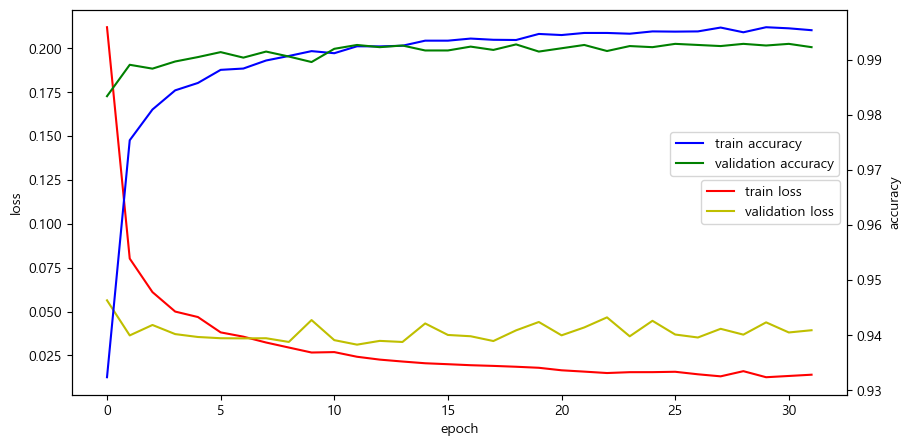

In [71]:
# 학습과정 표시하기(validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [72]:
# 평가하기
loss, accuracy = model.evaluate(X_val, Y_val)
loss, accuracy

313/313 [==============================] - 2s 6ms/step - loss: 0.0394 - accuracy: 0.9923


(0.039395254105329514, 0.9922999739646912)

In [81]:
# 예측치와 실제값을 이용한 교차표
y_hat = model.predict(X_test).argmax(axis=1)
pd.crosstab(y_test, y_hat)

313/313 [==============================] - 2s 6ms/step


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,976,0,1,0,0,1,1,0,0,1
1,0,1130,1,3,0,0,1,0,0,0
2,1,0,1026,1,0,0,0,4,0,0
3,0,0,0,1007,0,2,0,0,1,0
4,0,2,0,0,969,0,0,0,1,10
5,0,0,0,9,0,881,1,1,0,0
6,3,2,0,0,2,6,944,0,1,0
7,0,1,2,0,0,0,0,1023,1,1
8,1,0,2,2,0,1,0,0,966,2


In [84]:
cnt = 0
for y, h in zip(y_test, y_hat):
    if y != h:
        cnt += 1
print('예측이 틀린 갯수 : ', cnt)

예측이 틀린 갯수 :  82


i =  10000
cnt =  82


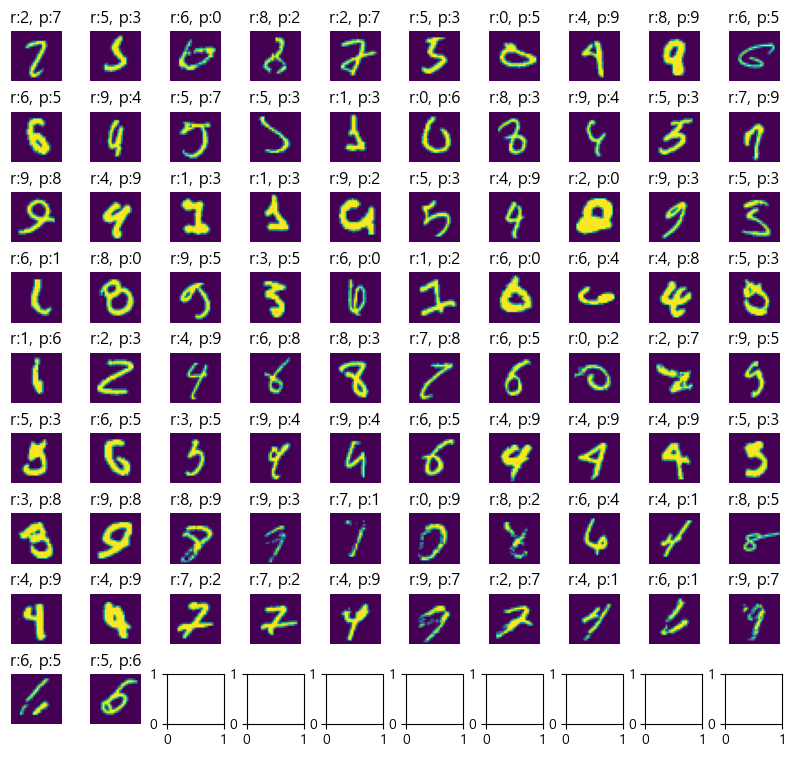

In [85]:
# 모델 학습 후 예측이 틀린 경우만 출력
plt_row = 9   # 10행 세로 
plt_col = 10  # 10열 가로
plt.rcParams['figure.figsize'] = (plt_col, plt_row)
plt.rc('font', family='Malgun Gothic')  # 윈도우즈 os
fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)
plt.subplots_adjust(hspace=0.6, wspace=0.4)  # 상하여백, 좌우여백

i = 0    # y_hat과 y_test를 액세스할 index
cnt = 0  # 출력할 횟수
while (cnt < plt_row*plt_col) & (i < len(y_test)):
    # 예측한 결과가 틀렸을 경우만 imshow(X_test[i]), 실제값과 예측치를 title에 출력
    if y_hat[i] == y_test[i]:  # 실제값 == 예측치일 경우
        i += 1
        continue
    # 예측한 값과 실제값이 다른 경우
    sub_plot = axarr[cnt // plt_col, cnt % plt_col]
    sub_plot.imshow(X_test[i].reshape(width, height))  # 예측이 틀린 그림
    title = 'r:{}, p:{}'.format(y_test[i], y_hat[i])
    sub_plot.set_title(title)
    sub_plot.axis('off')
    i += 1
    cnt += 1
print('i = ', i)
print('cnt = ', cnt)